In [ ]:
# Importing computational packages
import numpy as np
import pandas as pd

# Importing visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Importing the datasets
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Checking for the missing value present in each columns
total = dataset.isnull().sum().sort_values(ascending = False)
percent = (dataset.isnull().sum()/dataset.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dataset["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

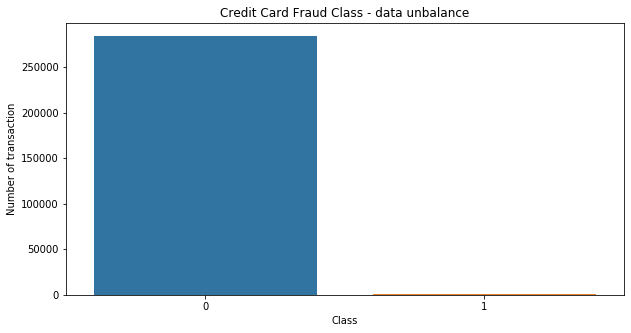

In [ ]:
# Visualization of training data

# Individual Plots - a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(10,5))
sns.countplot(dataset["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")
plt.show()

In [ ]:
#Observe the distribution of our classes
classes=dataset['Class'].value_counts()
normal_share = round(classes[0] / dataset['Class'].count()*100,2)
fraud_share = round(classes[1] / dataset['Class'].count()*100, 2)
normal_share, fraud_share

(99.83, 0.17)

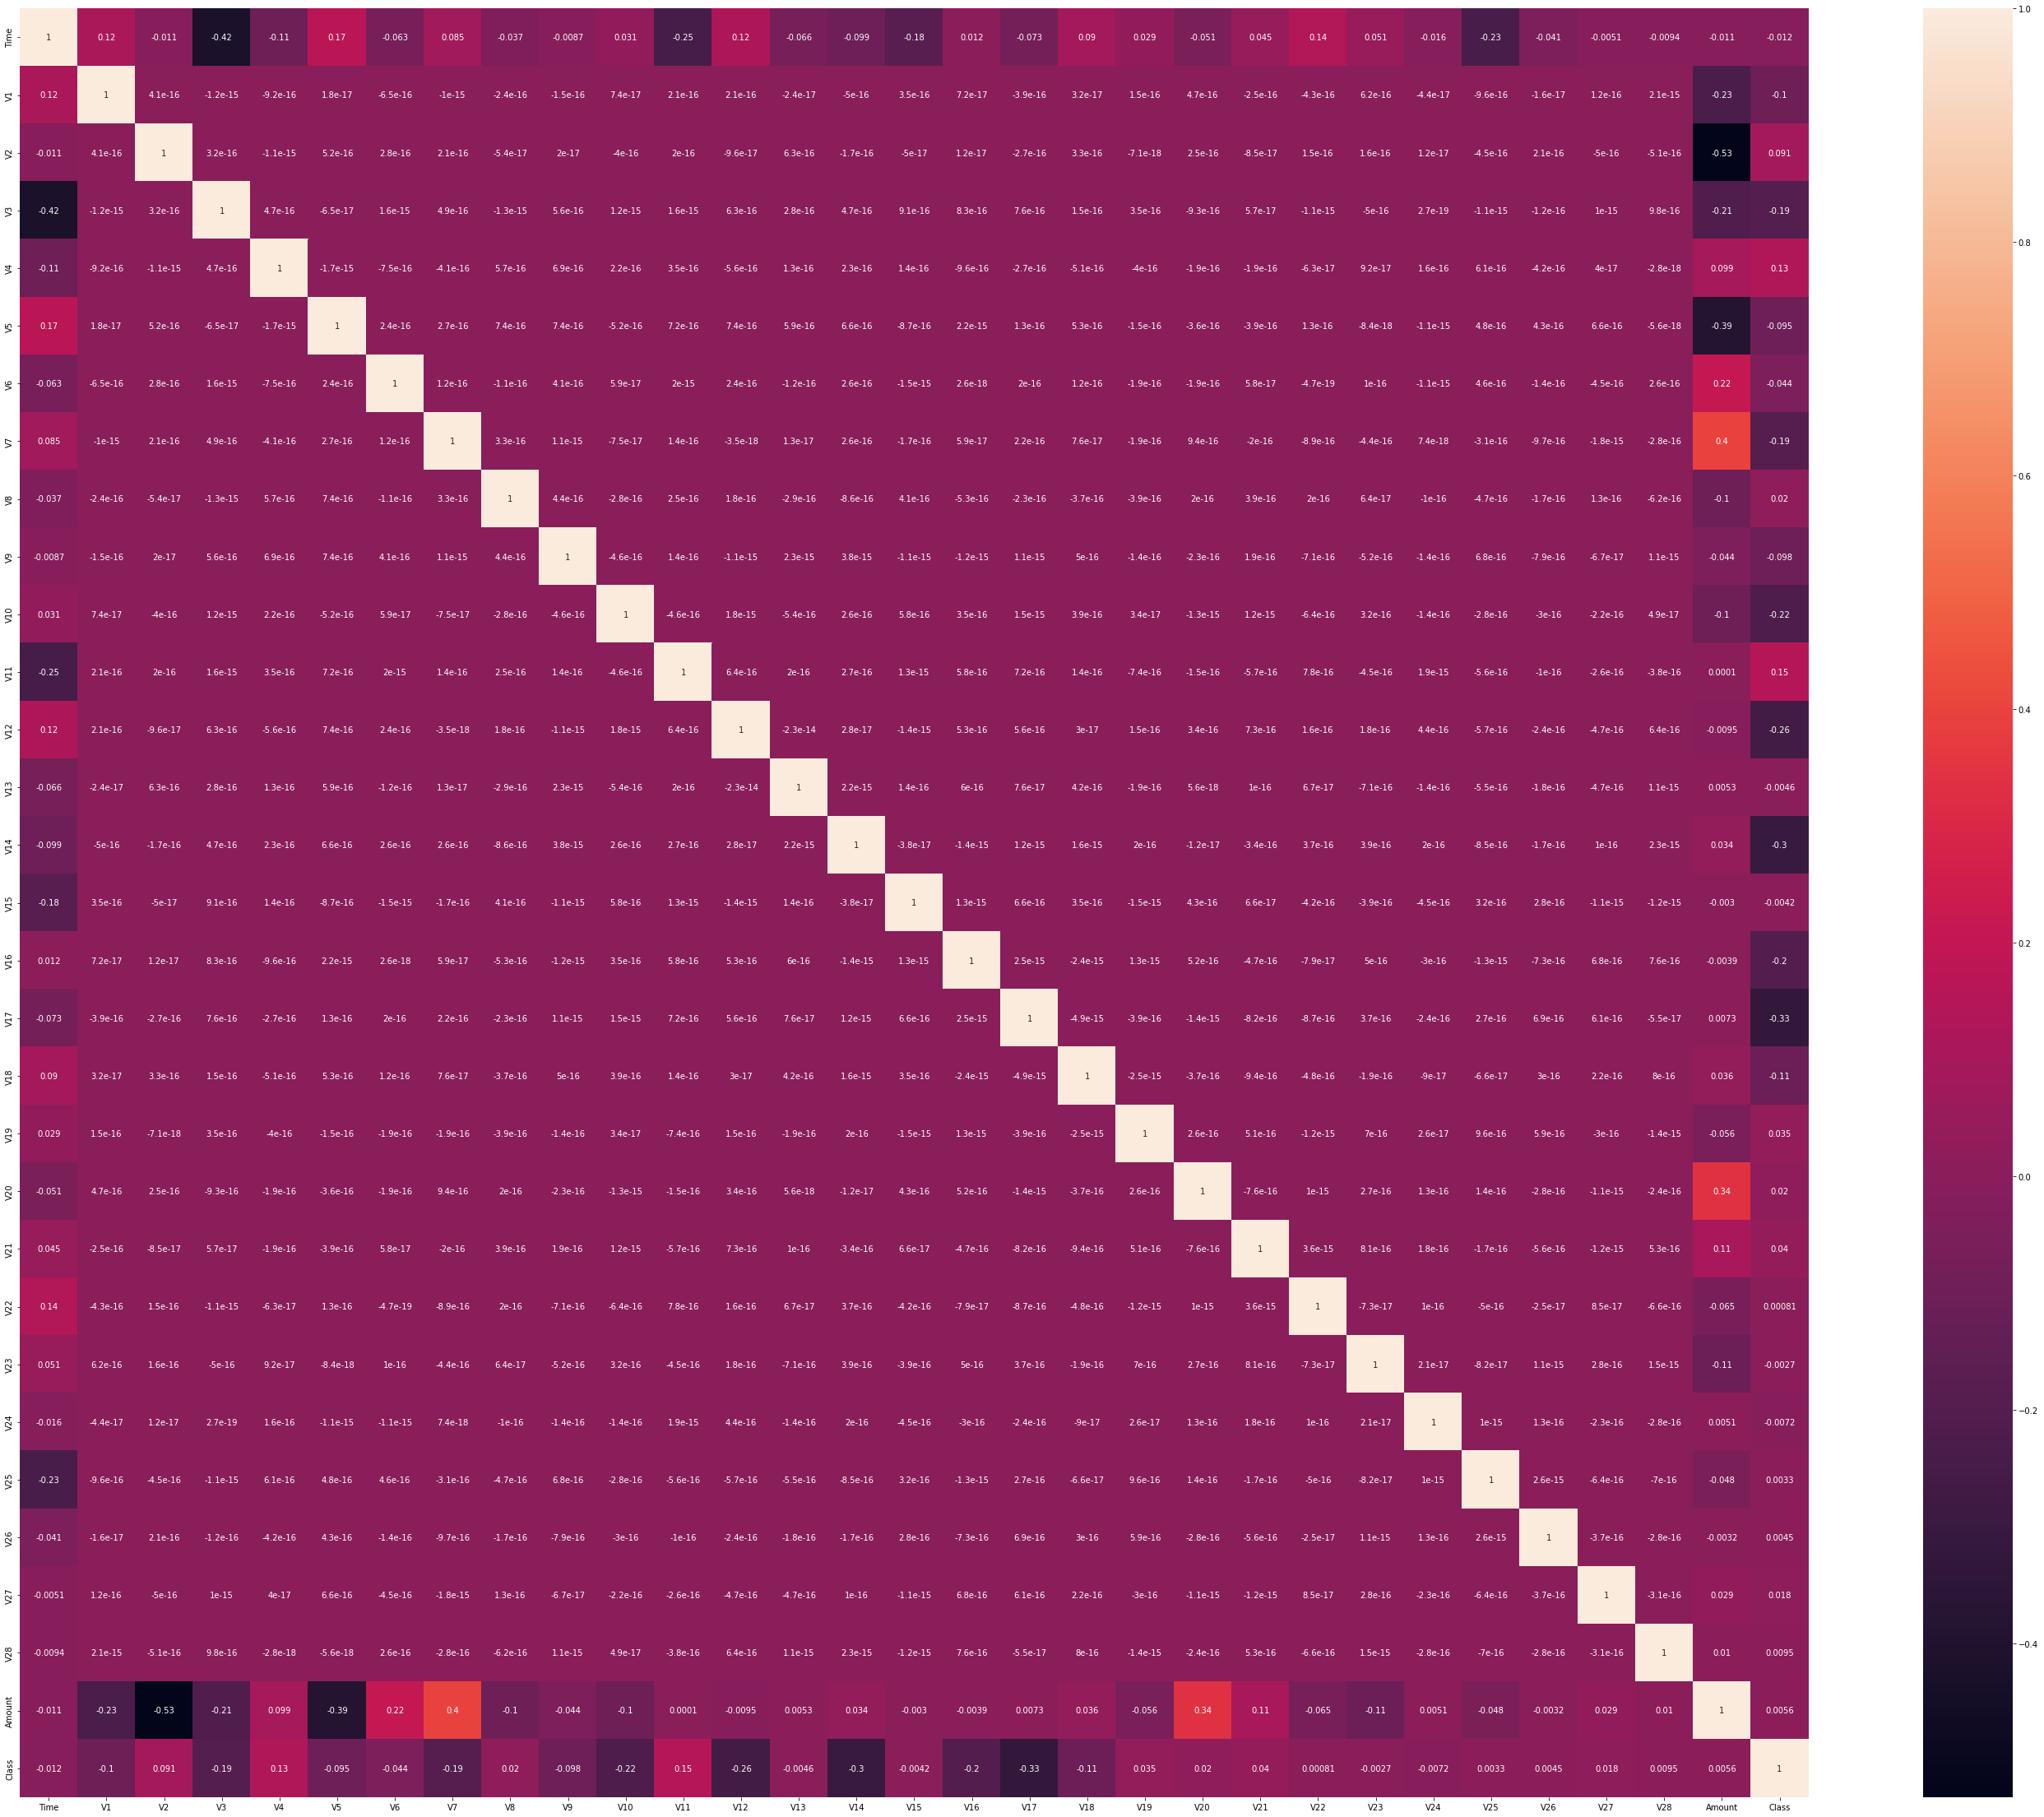

In [ ]:
# Heatmap 
import seaborn as sns
f, ax = plt.subplots(figsize=(50, 40))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=None, square=True, ax=ax,annot=True)
plt.show()

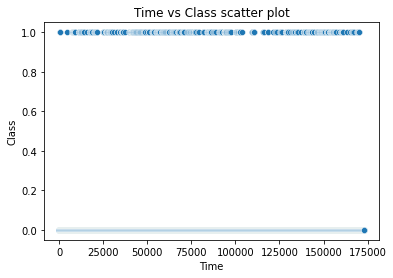

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(dataset["Time"], dataset["Class"])
plt.title("Time vs Class scatter plot")
plt.show()

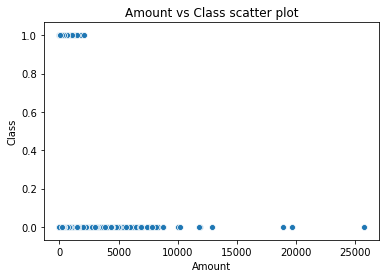

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(dataset["Amount"], dataset["Class"])
plt.title("Amount vs Class scatter plot")
plt.show()

In [ ]:
# Drop unnecessary columns
dataset = dataset.drop("Time", axis = 1)

<Figure size 432x288 with 0 Axes>

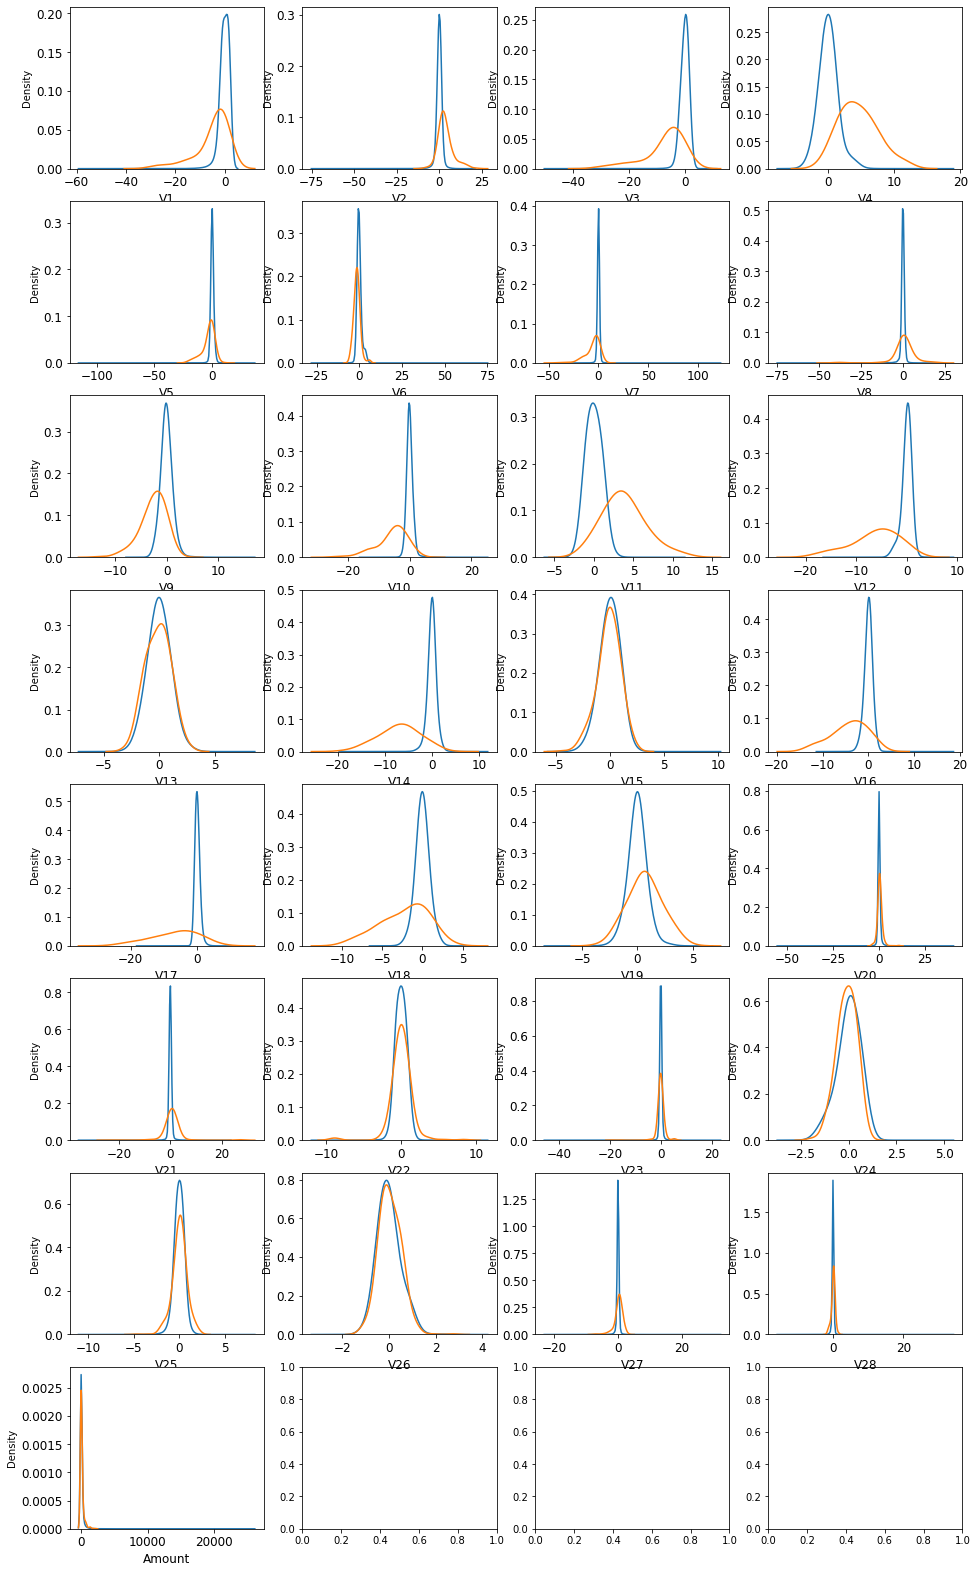

In [ ]:
# Plotting all the variable in displot to visualise the distribution
var = list(dataset.columns.values)

# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = dataset.loc[dataset['Class'] == 0]
t1 = dataset.loc[dataset['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [ ]:
#Random UnderSampling
fraud_data = dataset.loc[dataset['Class']==1]
non_fraud_data = dataset.loc[dataset['Class']==0][:1500]
undersample_data = pd.concat([fraud_data, non_fraud_data])
undersample_data = undersample_data.sample(frac=1)

In [ ]:
y = undersample_data["Class"]
X = undersample_data.drop("Class" , axis = 1)

In [ ]:
# Spltting the into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
318,-0.961507,0.743351,1.173582,-0.222593,0.740528,1.739959,0.313013,0.699419,0.354716,-0.333261,...,0.005877,-0.152862,-0.011971,-0.039394,-1.504440,-0.248248,0.411291,0.497315,0.207499,26.98
237426,-1.370976,-0.025465,-2.774907,2.650530,4.511309,-3.289344,-0.118841,-0.014279,-0.932773,-2.637442,...,0.701292,-0.048061,-0.599350,0.072193,-0.600351,0.371331,-0.370951,0.011970,0.145895,1.00
100,1.156939,0.037215,0.556799,0.519507,-0.479754,-0.352714,-0.222487,0.158242,0.011252,0.105584,...,-0.221852,-0.182662,-0.612268,0.197305,0.174883,0.032497,0.099480,-0.026816,0.004199,2.69
285,-0.188424,0.877602,-0.734686,-0.913404,1.941770,4.037423,-1.707118,-2.537641,-0.590338,-0.763039,...,0.543409,-0.824079,-1.042331,0.168265,0.963855,0.887850,0.171167,0.012284,0.164538,1.98
93424,-1.348042,2.522821,-0.782432,4.083047,-0.662280,-0.598776,-1.943552,-0.329579,-1.853274,-3.162136,...,0.348896,1.079871,-0.352026,-0.218358,0.125866,-0.074180,0.179116,0.612580,0.234206,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141258,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,-8.099119,...,1.129532,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.00
173,-0.820860,1.022567,1.996560,1.180141,0.232464,-0.123953,0.684371,-0.008256,-0.572410,-0.404867,...,0.005164,0.000169,0.183382,-0.299915,0.431806,0.456705,-0.213298,-0.033161,0.088372,9.99
314,-1.465381,1.382172,1.019790,0.250367,1.011414,-1.281807,1.186866,-0.312608,-0.701503,-1.067341,...,0.004784,-0.038147,0.083481,-0.266017,0.270833,0.754353,-0.491529,-0.689819,-0.329374,1.00
1214,-0.334479,0.226390,1.970052,1.813235,-0.308007,-0.046253,0.126702,-0.203989,0.316727,0.242608,...,0.133574,0.146153,0.900969,-0.210252,0.460403,-0.305401,-0.091483,-0.050375,-0.150339,64.50


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
18,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,0.345173,...,-2.196848,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,-0.182232
1120,-1.366797,-0.381816,2.909364,0.452824,0.646125,0.074504,-0.043701,-0.323218,0.698467,0.723171,...,0.314913,-0.219791,0.120994,-0.434589,0.063623,0.059021,0.365410,-0.447739,-0.363027,-0.331153
11880,-15.819179,8.775997,-22.804686,11.864868,-9.092361,-2.386893,-16.560368,0.948349,-6.310658,-13.088891,...,0.992279,-2.350634,1.036362,1.136051,-1.043414,-0.108923,0.657437,2.136424,-1.411945,-0.398759
1416,1.317317,-0.030417,-1.088874,-0.557892,2.030908,3.267773,-0.536308,0.808507,-0.052607,0.001610,...,0.014936,-0.313907,-1.068412,0.104669,0.992075,0.369762,0.110479,-0.028115,0.011664,-0.398806
141260,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,-8.337707,...,2.172709,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,2.018255


In [ ]:
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
886,-1.160187,0.759387,1.431250,-0.311891,0.877679,-0.259954,1.900304,-1.356093,0.868256,1.763919,...,-0.035205,-0.113170,0.383214,-0.436442,-0.017884,0.021083,-0.722678,-1.668030,-0.794192,-0.130700
547,-0.960819,0.071013,2.602819,-0.998693,-0.383880,-0.208286,0.368938,0.059514,0.504836,-0.678021,...,0.315315,-0.136827,-0.081334,-0.016162,0.605342,-0.121759,0.736684,0.077109,-0.069752,-0.138312
1352,-0.354831,0.678850,1.928599,0.268596,0.214598,-0.135651,0.582577,-0.013028,-0.685510,-0.008244,...,0.062845,-0.130071,-0.291571,-0.147517,0.205789,0.027219,0.284555,-0.203203,-0.254254,-0.399231
15506,-21.885434,12.930505,-24.098872,6.203314,-16.466099,-4.459842,-16.519836,14.535565,-3.897022,-8.650758,...,1.611998,1.762232,-1.579055,-0.951043,0.134565,1.507110,-0.222671,1.527655,0.453699,0.069232
69,-1.923213,-0.870482,2.320170,1.988776,0.417091,-0.380014,0.472139,-0.557333,-0.649079,1.410889,...,-0.369227,-0.686488,-0.779268,1.086055,0.518863,-0.363712,3.065576,-0.589022,-0.396110,-0.238018


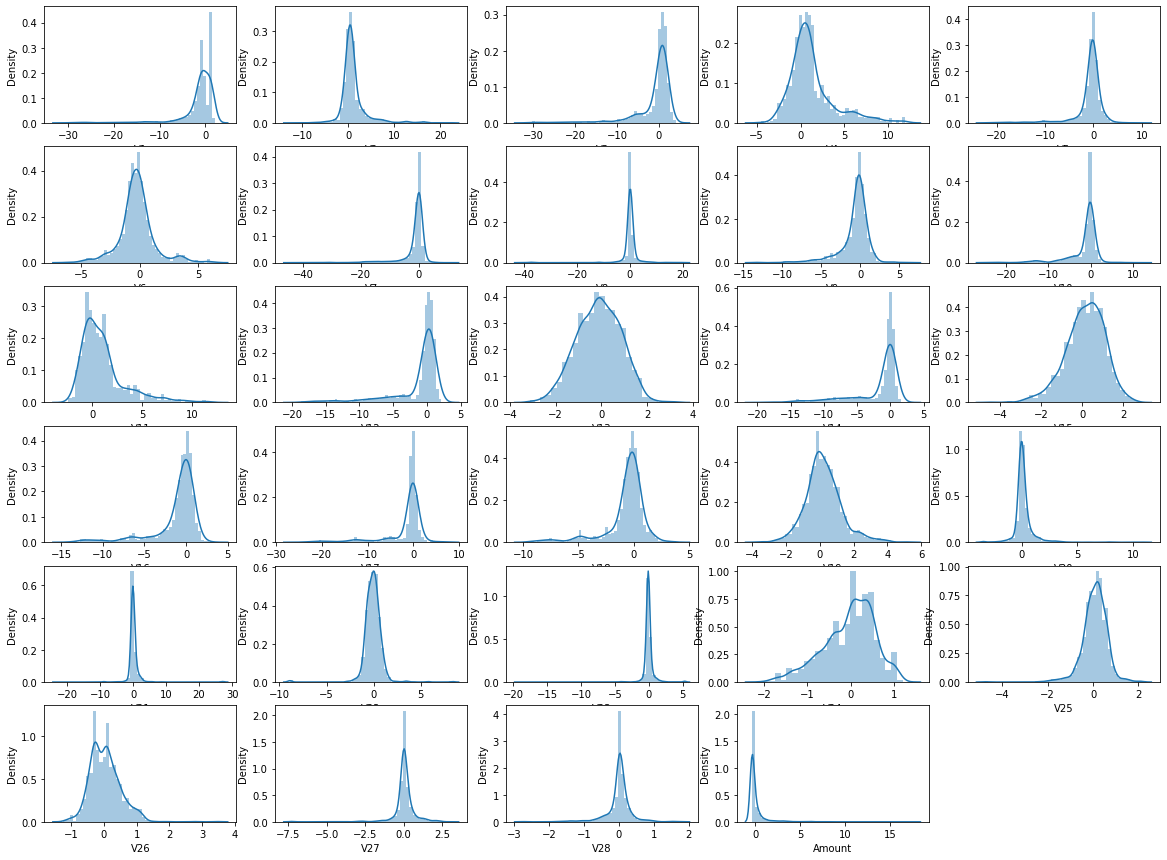

In [ ]:
var = X_train.columns
plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(6,5, i)
    sns.distplot(X_train[col])

plt.show()

In [ ]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

skew = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
skew.set_index("Features", inplace=True)
skew

,Skewness
Features,
V1,-3.929987
V2,2.796120
V3,-3.248978
V4,1.519556
V5,-3.368788
V6,0.458168
V7,-4.196713
V8,-5.764816
V9,-2.077197


In [ ]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = skew.loc[(skew["Skewness"] > 1) | (skew["Skewness"] <-1 )].index
skewed

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22', 'V23', 'V27', 'V28',
       'Amount'],
      dtype='object', name='Features')

In [ ]:
# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(copy=False)

# Fitting the power transformer in train data
X_train[skewed] = pt.fit_transform(X_train[skewed])

# Transforming the test data
X_test[skewed] = pt.transform(X_test[skewed])

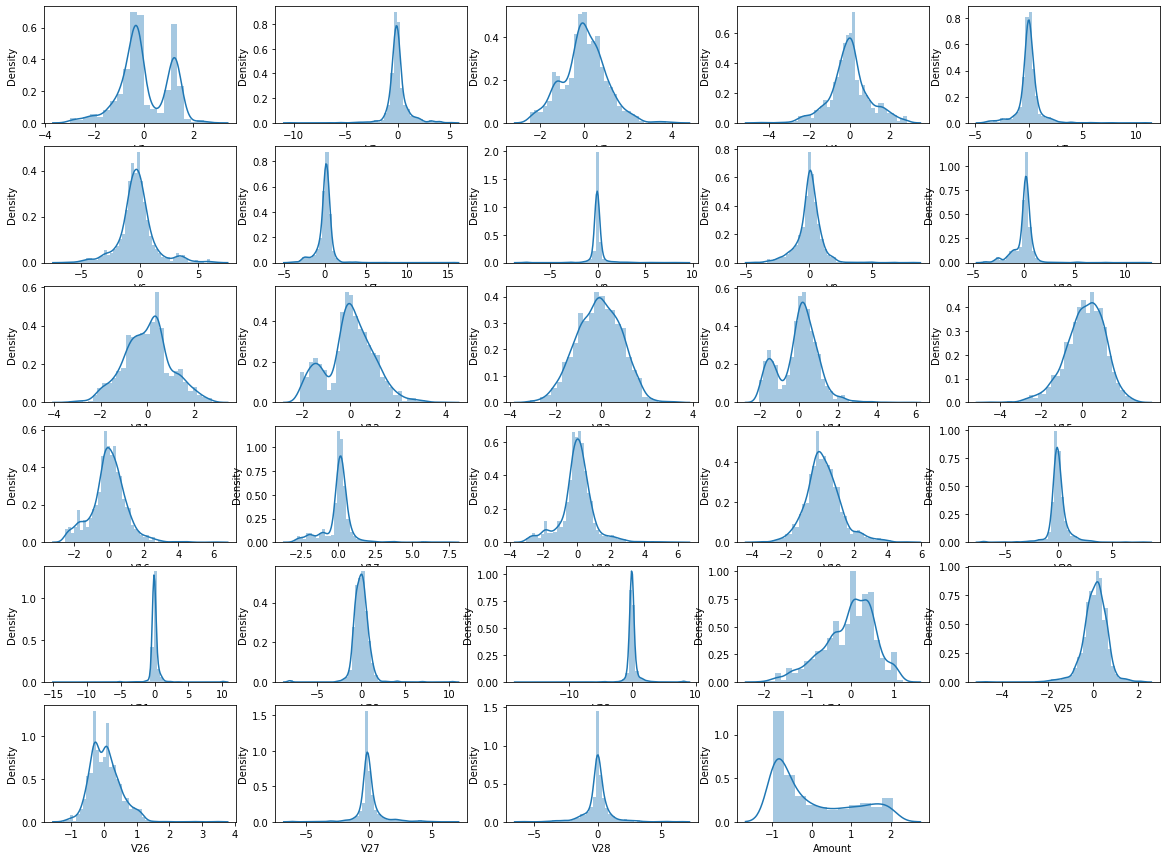

In [ ]:
# plot the histogram of a variable from the dataset again to see the result 
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(6,5, i)
    sns.distplot(X_train[col])

plt.show()

In [ ]:
def draw_cm(cf_matrix) :
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    plt.show()

In [ ]:
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate error rate
    conf_error = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_error,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

In [ ]:
#Implementing the Logistic Regression Model
model1 = LogisticRegression(random_state = 42)
model1.fit(X_train, y_train)
prediction = model1.predict(X_test)

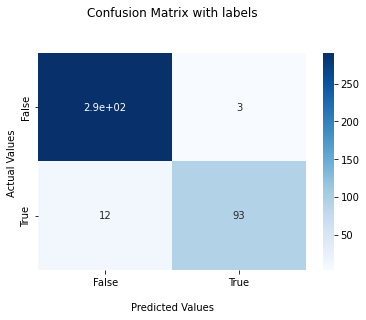

In [ ]:
# Confusion Matrix to check false positives and false negatives
cm = confusion_matrix(y_test , prediction)
model1_accuracy = metrics.accuracy_score(y_test,prediction);
draw_cm(cm)

In [ ]:
confusion_metrics(cm)

Accuracy: 0.96
Mis-Classification: 0.04
Sensitivity: 0.89
Specificity: 0.99
Precision: 0.99
f_1 Score: 0.93


In [ ]:
# Implementing the Decision Tree Model
model2 = DecisionTreeClassifier(max_depth = 2 , random_state = 42)
model2.fit(X_train, y_train)
prediction = model2.predict(X_test)

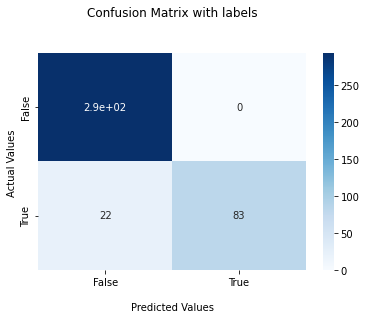

In [ ]:
# Confusion Matrix to check false positives and false negatives
cm = confusion_matrix(y_test , prediction)
model2_accuracy = metrics.accuracy_score(y_test,prediction);
draw_cm(cm)

In [ ]:
confusion_metrics(cm)

Accuracy: 0.94
Mis-Classification: 0.06
Sensitivity: 0.79
Specificity: 1.0
Precision: 1.0
f_1 Score: 0.88


In [ ]:
# Implementing the KNN Model
model3 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model3.fit(X_train, y_train)
prediction = model3.predict(X_test)

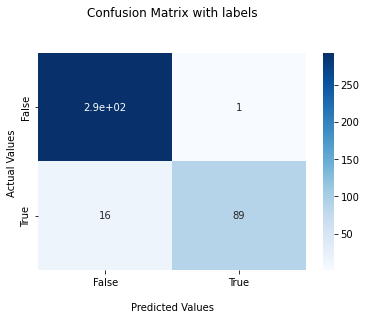

In [ ]:
# Confusion Matrix to check false positives and false negatives
cm = confusion_matrix(y_test , prediction)
model3_accuracy = metrics.accuracy_score(y_test,prediction);
draw_cm(cm)

In [ ]:
confusion_metrics(cm)

Accuracy: 0.96
Mis-Classification: 0.04
Sensitivity: 0.85
Specificity: 1.0
Precision: 1.0
f_1 Score: 0.92


In [ ]:
# Implementing the Support Vector Classification Model
model4 = SVC(kernel = 'linear', random_state = 42) #rbf kernel
model4.fit(X_train, y_train)
prediction = model4.predict(X_test)

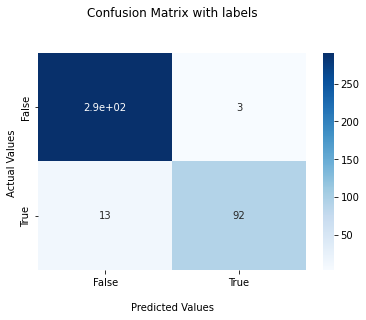

In [ ]:
# Confusion Matrix to check false positives and false negatives
cm = confusion_matrix(y_test , prediction)
model4_accuracy = metrics.accuracy_score(y_test,prediction);
draw_cm(cm)

In [ ]:
confusion_metrics(cm)

Accuracy: 0.96
Mis-Classification: 0.04
Sensitivity: 0.88
Specificity: 0.99
Precision: 0.99
f_1 Score: 0.93


In [ ]:
# Implementing the Naive Bayes Model
model5 = GaussianNB()
model5.fit(X_train, y_train)
prediction = model5.predict(X_test)

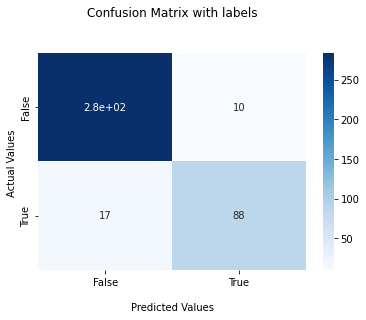

In [ ]:
# Confusion Matrix to check false positives and false negatives
cm = confusion_matrix(y_test , prediction)
model5_accuracy = metrics.accuracy_score(y_test,prediction);
draw_cm(cm)

In [ ]:
confusion_metrics(cm)

Accuracy: 0.93
Mis-Classification: 0.07
Sensitivity: 0.84
Specificity: 0.97
Precision: 0.97
f_1 Score: 0.9


In [ ]:
# Implementing the Random Forest Classification Model
model6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model6.fit(X_train, y_train)
prediction = model6.predict(X_test)

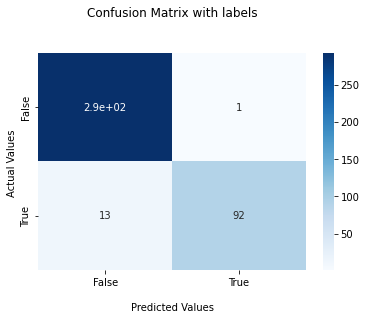

In [ ]:
# Confusion Matrix to check false positives and false negatives
cm = confusion_matrix(y_test , prediction)
model6_accuracy = metrics.accuracy_score(y_test,prediction);
draw_cm(cm)

In [ ]:
confusion_metrics(cm)

Accuracy: 0.96
Mis-Classification: 0.04
Sensitivity: 0.88
Specificity: 1.0
Precision: 1.0
f_1 Score: 0.93


Text(0, 0.5, 'Accuracy')

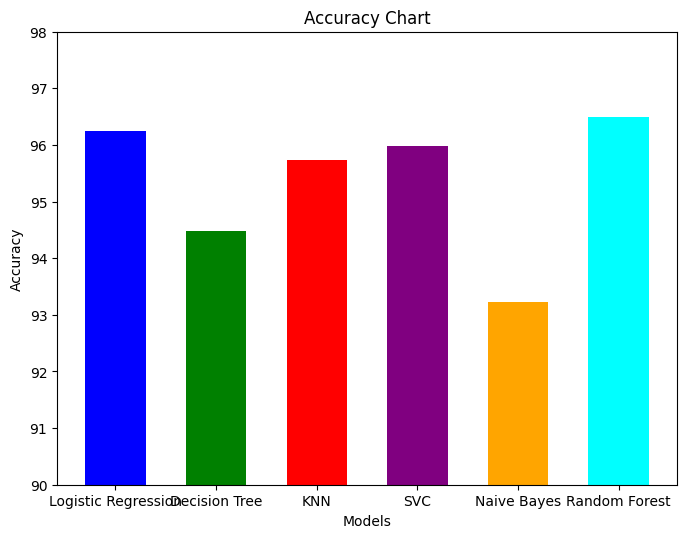

In [ ]:
# Plotting the accuracy of models implemented
xaxis = ["Logistic Regression" , "Decision Tree" , "KNN" , "SVC" , "Naive Bayes" , "Random Forest"]
yaxis = [model1_accuracy * 100 , model2_accuracy * 100 , model3_accuracy * 100 , model4_accuracy * 100 
         , model5_accuracy * 100 , model6_accuracy * 100]
plt.figure(figsize=(8, 6), dpi=100)
plt.ylim(ymin=90,ymax=98)
plt.bar(xaxis , yaxis , color=['blue','green','red','purple','orange','cyan'], width = 0.6)

plt.title("Accuracy Chart")
plt.xlabel("Models")
plt.ylabel("Accuracy")

In [ ]:
# Voting Ensemble for Classification(stacking ensemble)
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state = 42, shuffle = True)

# create the sub models
estimators = []
estimators.append(('logistic_reg', model1))
estimators.append(('knn', model3))
estimators.append(('random_forest', model6))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print(results.max())

0.9849246231155779
